In [14]:
from scipy.io import loadmat
import numpy as np 
import sympy as sp
mat = loadmat('gridturbulence.mat')
u = mat['u']
fs = mat['fs'][0,0] #convert to value
n, nblock = u.shape
dt = 1 / fs

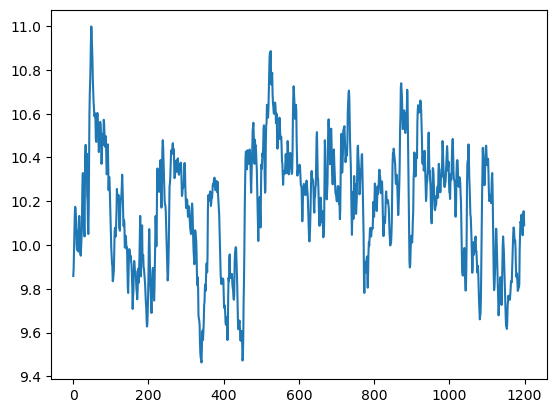

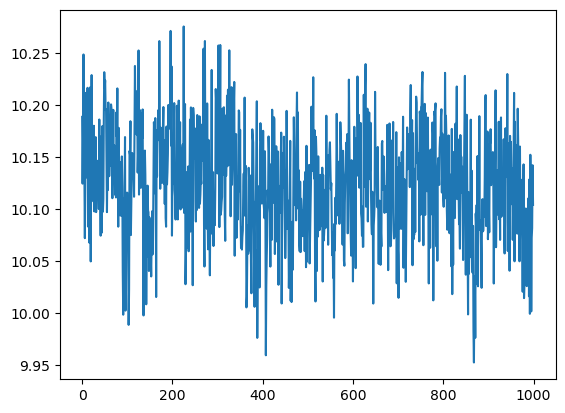

In [15]:
import matplotlib.pyplot as plt
plt.plot(u[:,0])
plt.show()

all_means = np.mean(u[:,:],axis=0)
plt.plot(all_means)
plt.show()


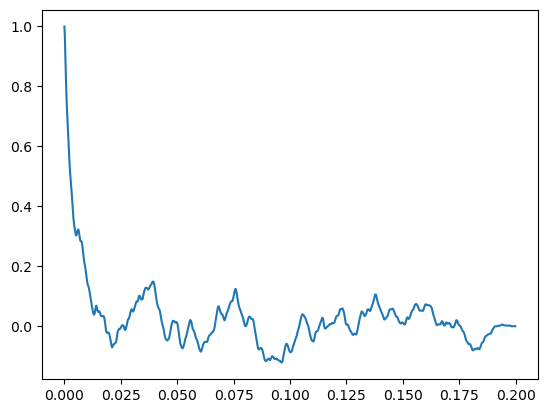

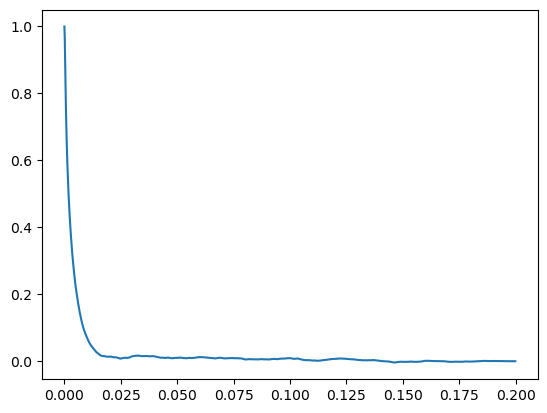

In [16]:
uf = u - u.mean() # fluctuation part
autocorr = np.correlate(uf[:,0], uf[:,0], mode='full') / n
autocorr_norm = autocorr / autocorr.max()
plt.plot(np.arange(n)*dt, autocorr_norm[n-1:])
plt.show()

all_autocorr = np.zeros((n, nblock))

for i in range(nblock):
    temp = np.correlate(uf[:,i], uf[:,i], mode='full') / n
    all_autocorr[:,i] = temp[n-1:] / temp.max()   

plt.plot( np.arange(n)*dt,np.mean(all_autocorr,axis=1))
plt.show()

In [17]:
integral = np.trapz(np.mean(all_autocorr, axis=1), np.arange(n)*dt)
print("Integral under the plot:", integral)

print(n*dt/integral)

print(int(integral/dt))



Integral under the plot: 0.004282059652125338
46.706495529723156
25


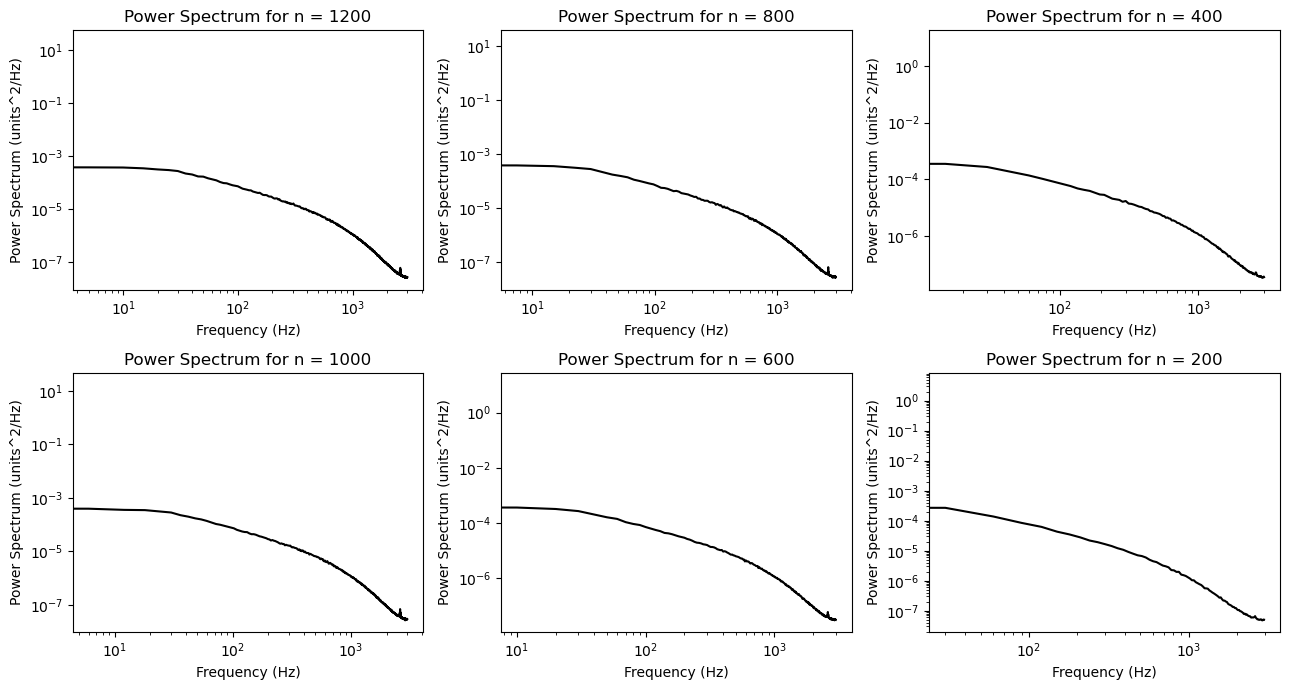

In [18]:
""" f = np.arange(n) / (n * dt)
uft = dt * np.fft.fft(u[:,0])
S = uft * uft.conjugate() / (n * dt)
plt.loglog(f[0:n//2], S[0:n//2].real, 'k-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectrum (units^2/Hz)')
plt.show() """

fig, axs = plt.subplots(2, 3, figsize=(13, 7))

for i, n_val in enumerate([1200, 1000, 800, 600, 400, 200]):
    S_all = np.zeros((n_val//2, nblock))
    f = np.arange(n_val) / (n_val * dt)

    for j in range(nblock):
        uft = dt * np.fft.fft(u[:n_val, j])
        S = uft * uft.conjugate() / (n_val * dt)
        S_all[:, j] = S[0:n_val//2].real

    row = i // 2
    col = i % 2
    axs[col, row].loglog(f[0:n_val//2], np.mean(S_all[:, :],axis=1), 'k-')
    axs[col, row].set_xlabel('Frequency (Hz)')
    axs[col, row].set_ylabel('Power Spectrum (units^2/Hz)')
    axs[col, row].set_title(f'Power Spectrum for n = {n_val}')

plt.tight_layout()
plt.show()


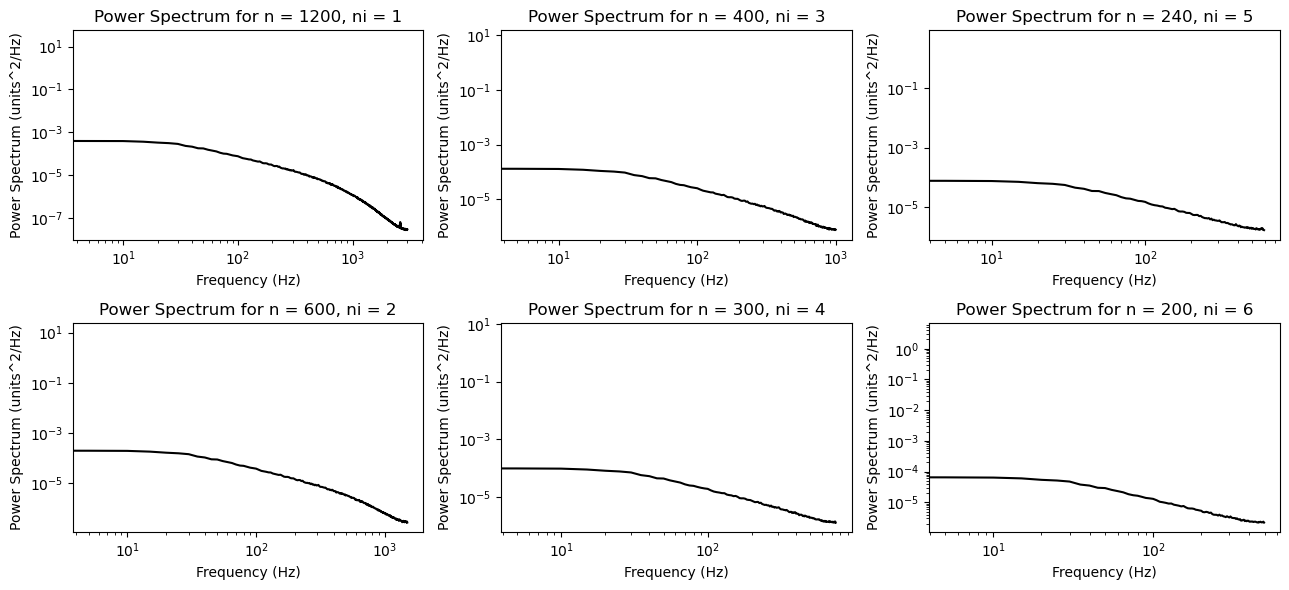

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(13, 6))

for i, ni in enumerate([1,2, 3, 4, 5,6]):
    n_val = int(n/ni)
    S_all = np.zeros((n_val//2, nblock))
    f = np.arange(n_val) / (n_val * dt*ni)

    for j in range(nblock):
        uft = dt * np.fft.fft(u[::ni, j])
        S = uft * uft.conjugate() / (n_val * dt)
        S_all[:, j] = S[0:n_val//2].real

    row = i // 2
    col = i % 2
    axs[col, row].loglog(f[0:n_val//2], np.mean(S_all[:, :],axis=1), 'k-')
    axs[col, row].set_xlabel('Frequency (Hz)')
    axs[col, row].set_ylabel('Power Spectrum (units^2/Hz)')
    axs[col, row].set_title(f'Power Spectrum for n = {n_val}, ni = {ni}')

plt.tight_layout()
plt.show()


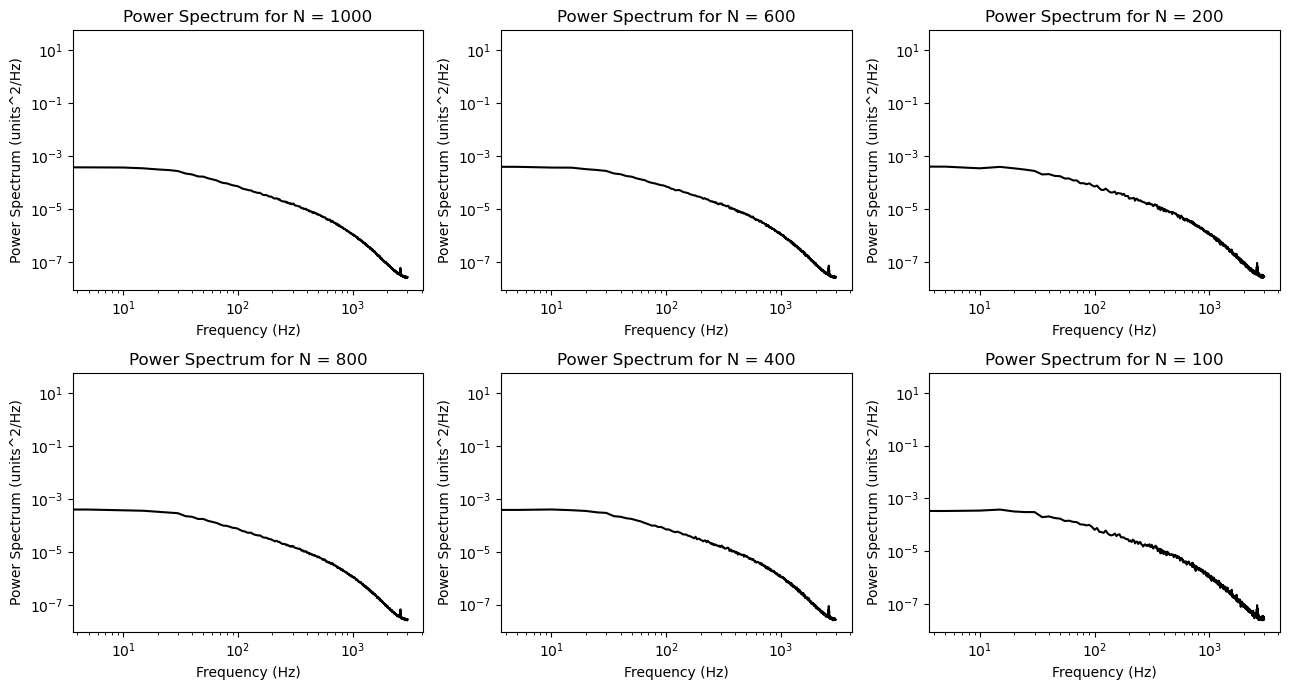

In [21]:
fig, axs = plt.subplots(2, 3, figsize=(13, 7))

for i, nblock in enumerate([1000, 800, 600, 400, 200, 100]):
    n_val = n
    S_all = np.zeros((n_val//2, nblock))
    f = np.arange(n_val) / (n_val * dt)

    for j in range(nblock):
        uft = dt * np.fft.fft(u[:n_val, j])
        S = uft * uft.conjugate() / (n_val * dt)
        S_all[:, j] = S[0:n_val//2].real

    row = i // 2
    col = i % 2
    axs[col, row].loglog(f[0:n_val//2], np.mean(S_all[:, :],axis=1), 'k-')
    axs[col, row].set_xlabel('Frequency (Hz)')
    axs[col, row].set_ylabel('Power Spectrum (units^2/Hz)')
    axs[col, row].set_title(f'Power Spectrum for N = {nblock}')

plt.tight_layout()
plt.show()